# Integrate and Fire

In [1]:
# LIBRARY

import numpy as np # vector manipulation

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm
from matplotlib import gridspec
import IPython.display as ipd

In [2]:

dt=0.5
t_rest=0

time=np.arange(0,1000,dt)

tau_m=10
R_m=10
t_isi=0
V_reset=E_L=-65
V_exact=V_reset*np.ones(len(time))
V_th=-50

I_syn=np.cos(2*np.pi*time/100)+1
for i in range(0,len(time)):
    V_exact[i]=E_L+R_m*I_syn[i]+(V_reset-E_L-R_m*I_syn[i])*np.exp(-(time[i]-t_isi)/tau_m)
    if V_exact[i]>V_th:
        V_exact[i-1]=0
        V_exact[i]=V_reset
        t_isi=time[i]


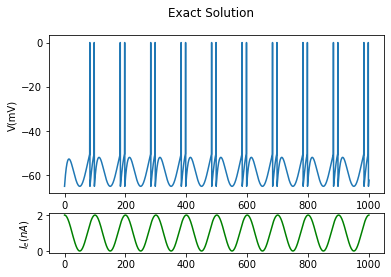

In [3]:
fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(2, 1,  height_ratios=[4, 1]) 
plt.subplot(gs[0])
plt.plot(time,V_exact)
plt.ylabel('V(mV)')
plt.subplot(gs[1])
plt.ylabel(r'$I_e(nA)$')
plt.plot(time, I_syn,'g')
plt.suptitle('Exact Solution')
plt.show()

In [4]:
# LIF parameters
Vm=V_reset*np.ones(len(time))
tau_ref=1

for i,t in enumerate(time):
    if t >t_rest:
        Vm[i]=Vm[i-1]+dt*(-Vm[i-1]+E_L+I_syn[i-1]*R_m)/tau_m
        if Vm[i]>=V_th:
            Vm[i-1]=0
            Vm[i]=V_reset
            t_rest=t+tau_ref
   

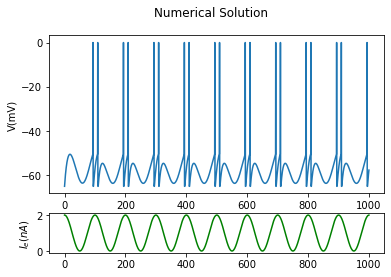

In [5]:
fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(2, 1,  height_ratios=[4, 1]) 


plt.subplot(gs[0])
plt.plot(time,Vm)
plt.ylabel('V(mV)')
plt.subplot(gs[1])
plt.ylabel(r'$I_e(nA)$')

plt.plot(time, I_syn,'g')
plt.suptitle('Numerical Solution')


plt.show()

In [10]:
ipd.Audio(Vm, rate=1000/dt)

In [12]:
ipd.Audio(V_exact, rate=1000/dt)